In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

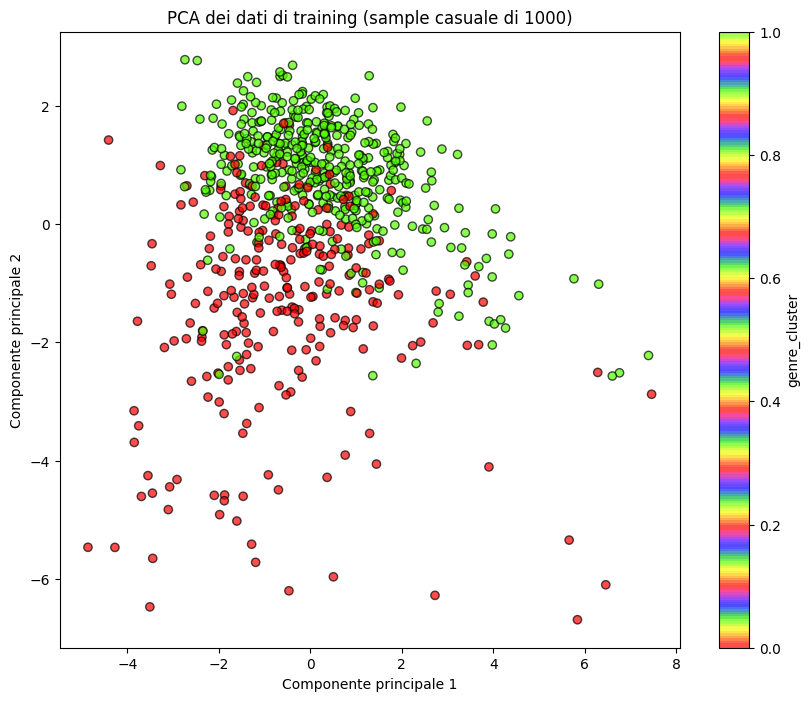

Accuracy del modello SVM: 0.98
Accuracy 0.9966666666666667
F1-score [0.995671   0.99728997]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       116
           1       0.99      1.00      1.00       184

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



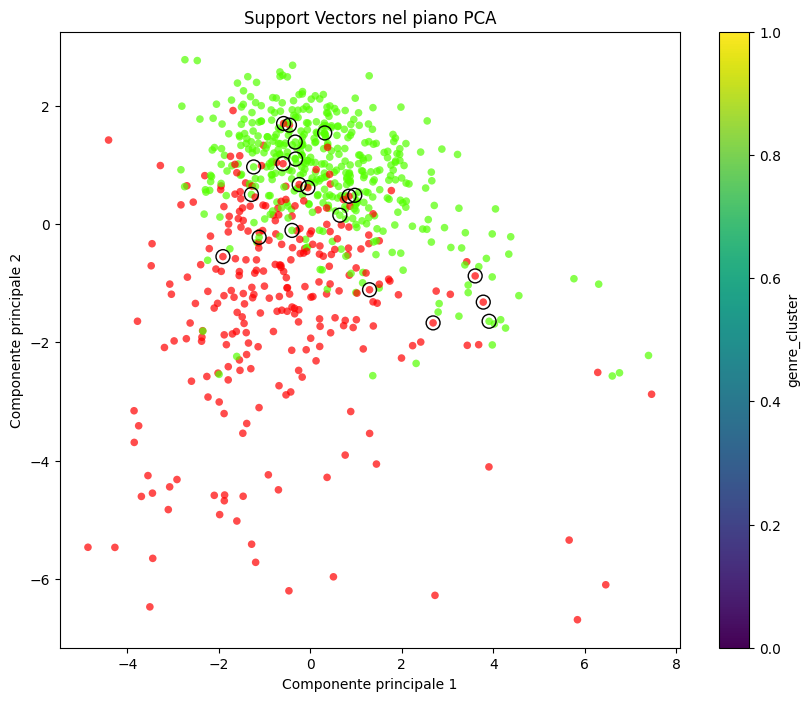

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Carica il dataset
df_track = pd.read_csv('tracks.csv', low_memory=False)

# Rimuovi righe con valori mancanti e duplicati
df_track.dropna(inplace=True)
df_track.drop_duplicates(subset='id', keep='first', inplace=True)

# Seleziona le colonne di interesse
columns = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'start_of_fade_out', 
           'n_beats']
df_sub = df_track[columns]

# Aggiungi una colonna per il genere "happy/sad"
df_track['genre_happy_sad'] = df_track['energy'].apply(lambda x: 1 if x > 0.6 else 0)

# Seleziona le features X e il target y
X = df_sub.values
y = df_track['genre_happy_sad'].values

# Prendi un sample casuale di 50 dati
np.random.seed(42)  # Imposta il seed per riproducibilità
sample_indices = np.random.choice(len(X), size=50, replace=False)
X_sample = X[sample_indices]
y_sample = y[sample_indices]

# Dividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=100, stratify=y_sample)

# Standardizza i dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applica PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot PCA dei dati di training
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.colorbar(label='genre_cluster')
plt.title('PCA dei dati di training (sample casuale di 50)')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.show()

# Addestra un modello SVM
svm = LinearSVC(random_state=100)
svm.fit(X_train, y_train)

# Valuta il modello
accuracy = svm.score(X_test, y_test)
print(f'Accuracy del modello SVM: {accuracy:.2f}')

# Esempio di ricerca grid search per ottimizzare C
param_grid = {'C': [0.1, 1, 10, 100, 500, 1000]}
grid_search = GridSearchCV(LinearSVC(random_state=100), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Addestra e valuta il modello con il miglior parametro C trovato
clf = LinearSVC(C=best_params['C'], random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Plot degli support vectors nel piano PCA
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]
support_vectors_pca = pca.transform(support_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.title('Support Vectors nel piano PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.colorbar(label='genre_cluster')
plt.show()



In [2]:
df_track = pd.read_csv('tracks.csv', low_memory=False)
df_track.dropna(inplace=True)  
df_track.drop_duplicates(subset='id' ,keep='first', inplace=True)
df_track

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1,209655,True,23,2,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,209655,4,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,edm
109543,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1,205724,True,56,1,Danny Avila,single,End Of The Night,...,205724,4,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,edm
109544,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1,195853,True,80,3,David Guetta;Akon,album,One More Love,...,195853,4,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,edm
109545,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1,208698,False,60,1,Diviners;Philly K.,single,Savannah,...,208698,4,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,edm


In [3]:
genre_map = {
    'minimal-techno': 'Electronic',
    'hip-hop': 'Hip-Hop/Rap',
    'honky-tonk': 'Country',
    'house': 'Electronic',
    'idm': 'Electronic',
    'indian': 'World',
    'indie-pop': 'Indie',
    'indie': 'Indie',
    'industrial': 'Electronic',
    'iranian': 'World',
    'j-dance': 'Electronic',
    'j-idol': 'Pop',
    'j-pop': 'Pop',
    'j-rock': 'Rock',
    'jazz': 'Jazz',
    'k-pop': 'Pop',
    'alternative': 'Alternative',
    'ambient': 'Electronic',
    'anime': 'Pop',
    'black-metal': 'Metal',
    'bluegrass': 'Country',
    'blues': 'Blues',
    'brazil': 'World',
    'breakbeat': 'Electronic',
    'sleep': 'Ambient',
    'songwriter': 'Folk',
    'soul': 'R&B/Soul',
    'spanish': 'World',
    'study': 'Ambient',
    'swedish': 'Pop',
    'synth-pop': 'Electronic',
    'tango': 'World',
    'techno': 'Electronic',
    'trance': 'Electronic',
    'trip-hop': 'Electronic',
    'turkish': 'World',
    'world-music': 'World',
    'edm': 'Electronic',
    'electro': 'Electronic',
    'electronic': 'Electronic',
    'emo': 'Alternative',
    'folk': 'Folk',
    'forro': 'World',
    'french': 'World',
    'funk': 'Funk',
    'garage': 'Electronic',
    'german': 'World',
    'gospel': 'Gospel',
    'goth': 'Alternative',
    'grindcore': 'Metal',
    'groove': 'R&B/Soul',
    'grunge': 'Rock',
    'guitar': 'Rock',
    'acoustic': 'Folk',
    'afrobeat': 'World',
    'alt-rock': 'Rock',
    'happy': 'Pop',
    'hard-rock': 'Rock',
    'hardcore': 'Metal',
    'hardstyle': 'Electronic',
    'heavy-metal': 'Metal',
    'mandopop': 'Pop',
    'metal': 'Metal',
    'metalcore': 'Metal',
    'pop-film': 'Pop',
    'pop': 'Pop',
    'power-pop': 'Pop',
    'progressive-house': 'Electronic',
    'psych-rock': 'Rock',
    'punk-rock': 'Rock',
    'punk': 'Rock',
    'r-n-b': 'R&B/Soul',
    'reggae': 'Reggae',
    'reggaeton': 'Reggaeton',
    'rock-n-roll': 'Rock',
    'rock': 'Rock',
    'rockabilly': 'Rock',
    'romance': 'Pop',
    'sad': 'Pop',
    'salsa': 'Latino',
    'samba': 'Latino',
    'sertanejo': 'Latino',
    'show-tunes': 'Musical',
    'ska': 'Reggae',
    'mpb': 'World',
    'new-age': 'New Age',
    'kids': 'Children',
    'latin': 'Latino',
    'latino': 'Latino',
    'malay': 'World',
    'chicago-house': 'Electronic',
    'children': 'Children',
    'chill': 'Ambient',
    'classical': 'Classical',
    'club': 'Electronic',
    'comedy': 'Comedy',
    'country': 'Country',
    'opera': 'Classical',
    'pagode': 'World',
    'party': 'Pop',
    'piano': 'Classical',
    'british': 'World',
    'cantopop': 'Pop',
    'dance': 'Electronic',
    'dancehall': 'Reggae',
    'death-metal': 'Metal',
    'deep-house': 'Electronic',
    'detroit-techno': 'Electronic',
    'disco': 'Electronic',
    'disney': 'Children',
    'drum-and-bass': 'Electronic',
    'dub': 'Reggae',
    'dubstep': 'Electronic'
}

df_track['genre_cluster'] = df_track['genre'].replace(genre_map)


In [4]:
columns = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'start_of_fade_out', 
           'n_beats']
df_sub = df_track[columns]
df_sub

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,start_of_fade_out,n_beats
0,290479,52,0.532,0.517,-9.846,0.4930,0.54700,0.535000,0.0854,0.2390,186.001,275.90530,705.0
1,539229,45,0.750,0.340,-12.759,0.0326,0.16700,0.648000,0.1060,0.1450,120.016,517.28253,1074.0
2,264200,39,0.801,0.639,-10.681,0.1040,0.02900,0.466000,0.0688,0.3200,118.052,259.04180,516.0
3,387413,0,0.675,0.543,-11.983,0.0639,0.04840,0.719000,0.1120,0.0374,128.990,387.41360,826.0
4,248956,0,0.761,0.671,-13.346,0.0418,0.51300,0.917000,0.1150,0.1190,120.003,239.63574,493.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,209655,23,0.466,0.982,-2.674,0.0752,0.00841,0.323000,0.3580,0.3700,173.958,200.10376,585.0
109543,205724,56,0.666,0.720,-4.483,0.0269,0.37100,0.000000,0.0793,0.3120,99.970,200.98611,339.0
109544,195853,80,0.813,0.627,-5.018,0.0486,0.07710,0.000616,0.1310,0.8010,130.011,189.48643,417.0
109545,208698,60,0.653,0.779,-3.133,0.0392,0.37200,0.000001,0.0392,0.3870,108.074,197.41605,359.0


Data Preparation

In [5]:
df_track['genre_happy_sad'] = df_track['energy'].apply(lambda x: 1 if x > 0.6 else 0)

In [8]:
X = df_sub.values
y = df_track['genre_happy_sad'].values
X.shape, y.shape

((89562, 13), (89562,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62693, 13), (26869, 13), (62693,), (26869,))

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

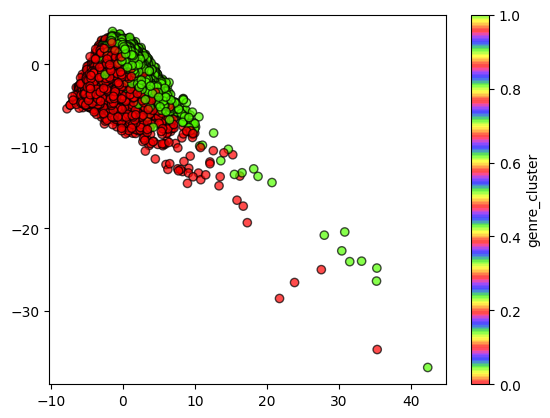

In [13]:
# Convert genre labels to numeric values
label_dict = {label: idx for idx, label in enumerate(np.unique(y_train))}
label_numeric = np.array([label_dict[label] for label in y_train])

# Plot using a colormap
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_numeric, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

# Add colorbar to show which numeric values correspond to which categories
plt.colorbar(label='genre_cluster')
plt.show()


Linear SVM

In [14]:
from sklearn.svm import LinearSVC

In [15]:
from sklearn.svm import LinearSVC

# Crea un'istanza di LinearSVC
svm = LinearSVC(random_state=100)

# Addestra il modello SVM
svm.fit(X_train, y_train)


LinearSVC(random_state=100)

Valutazione del modello:

In [16]:
# Valuta il modello
accuracy = svm.score(X_test, y_test)
print(f'Accuracy del modello SVM: {accuracy:.2f}')


Accuracy del modello SVM: 1.00


Predizioni (opzionale):

In [17]:
# Esempio di predizione
y_pred = svm.predict(X_test)


Tuning degli iperparametri (opzionale):

In [18]:
from sklearn.model_selection import GridSearchCV

# Esempio di ricerca grid search per ottimizzare C
param_grid = {'C': [0.1, 1, 10, 100, 500, 1000]}
grid_search = GridSearchCV(LinearSVC(random_state=100), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


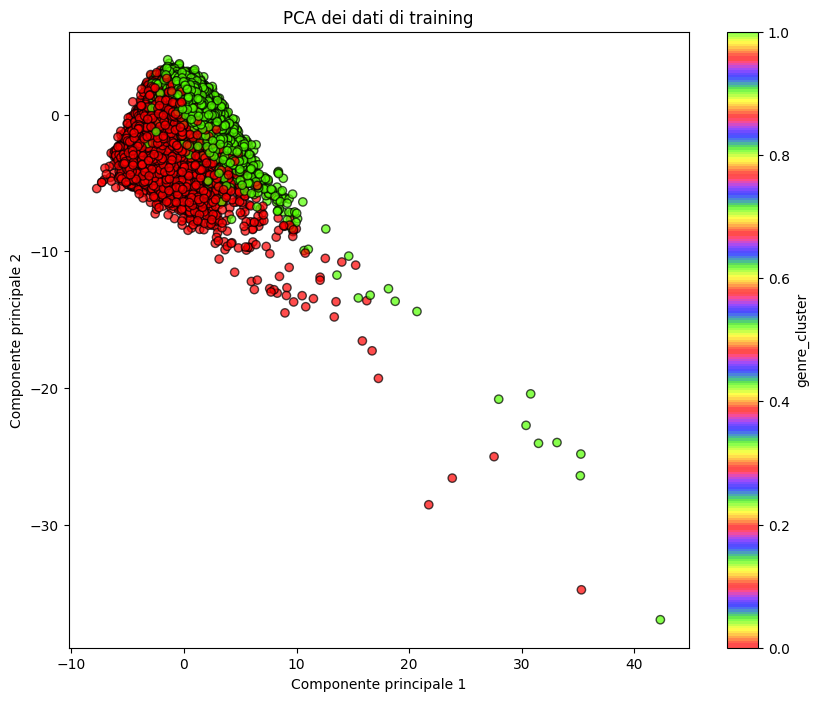

In [19]:
import matplotlib.pyplot as plt

# Plot PCA dei dati di training
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_numeric, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.colorbar(label='genre_cluster')
plt.title('PCA dei dati di training')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.show()


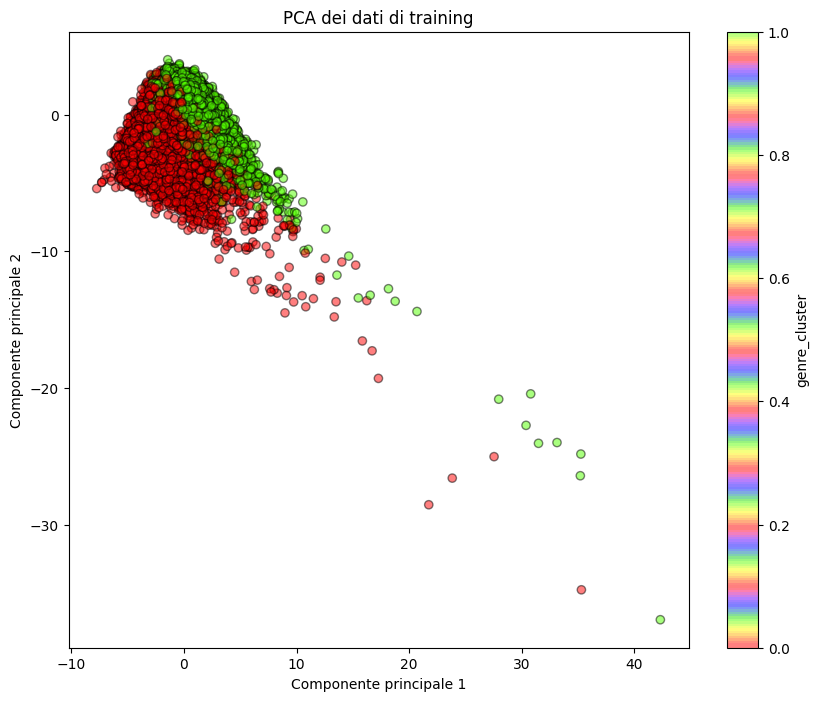

In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_numeric, cmap=plt.cm.prism, edgecolor='k', alpha=0.5)  # Aggiunta di alpha qui
plt.colorbar(label='genre_cluster')
plt.title('PCA dei dati di training')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.show()


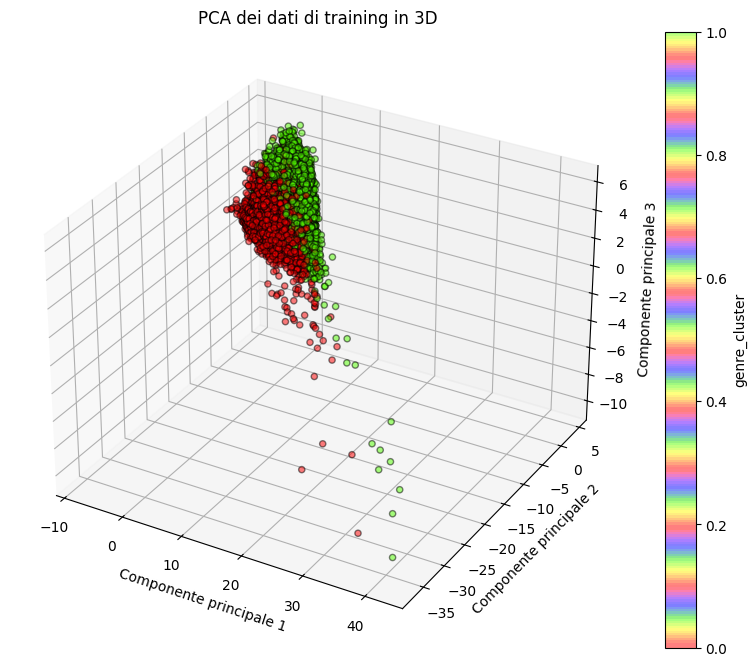

In [33]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_train)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=label_numeric, cmap=plt.cm.prism, edgecolor='k', alpha=0.5)
ax.set_xlabel('Componente principale 1')
ax.set_ylabel('Componente principale 2')
ax.set_zlabel('Componente principale 3')
plt.colorbar(scatter, label='genre_cluster')
plt.title('PCA dei dati di training in 3D')
plt.show()


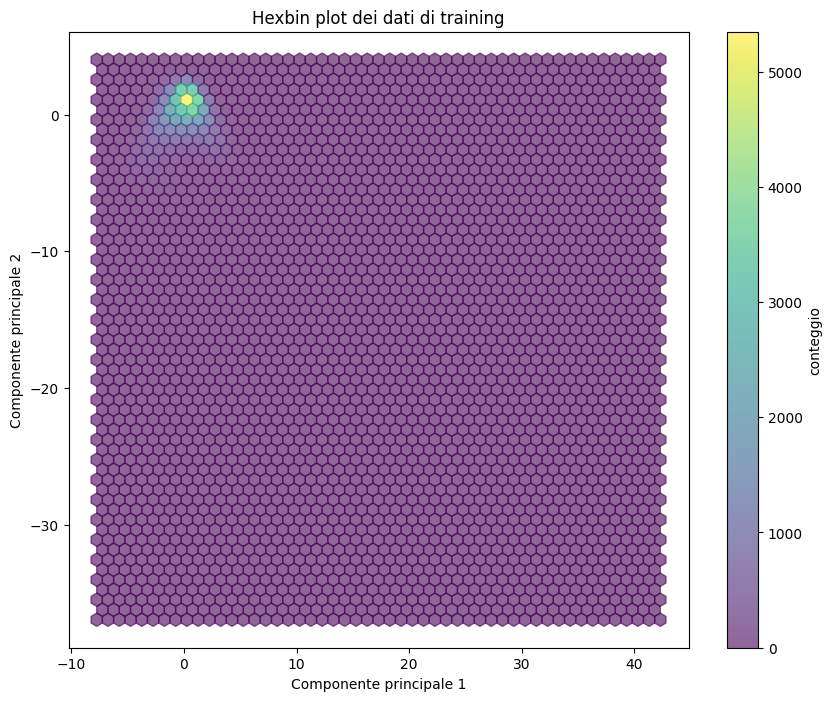

In [34]:
plt.figure(figsize=(10, 8))
plt.hexbin(X_pca[:, 0], X_pca[:, 1], gridsize=50, cmap='viridis', alpha=0.6)
plt.colorbar(label='conteggio')
plt.title('Hexbin plot dei dati di training')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.show()


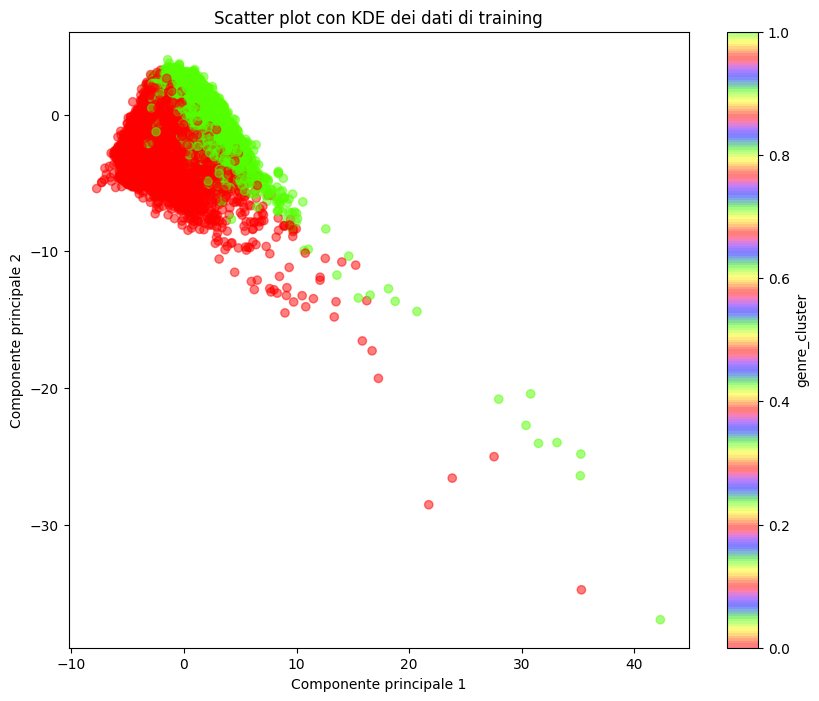

In [35]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(X_pca.T)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_numeric, cmap=plt.cm.prism, alpha=0.5)
plt.colorbar(label='genre_cluster')
plt.title('Scatter plot con KDE dei dati di training')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.show()


In [20]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9994789534407682
F1-score [0.99935768 0.99956171]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10900
           1       1.00      1.00      1.00     15969

    accuracy                           1.00     26869
   macro avg       1.00      1.00      1.00     26869
weighted avg       1.00      1.00      1.00     26869



In [21]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9998511295545052
F1-score [0.9998165  0.99987477]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10900
           1       1.00      1.00      1.00     15969

    accuracy                           1.00     26869
   macro avg       1.00      1.00      1.00     26869
weighted avg       1.00      1.00      1.00     26869



In [22]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9880159291376679
F1-score [0.98518723 0.9899375 ]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10900
           1       0.99      0.99      0.99     15969

    accuracy                           0.99     26869
   macro avg       0.99      0.99      0.99     26869
weighted avg       0.99      0.99      0.99     26869



In [23]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [24]:
support_vectors_pca = pca.transform(support_vectors)

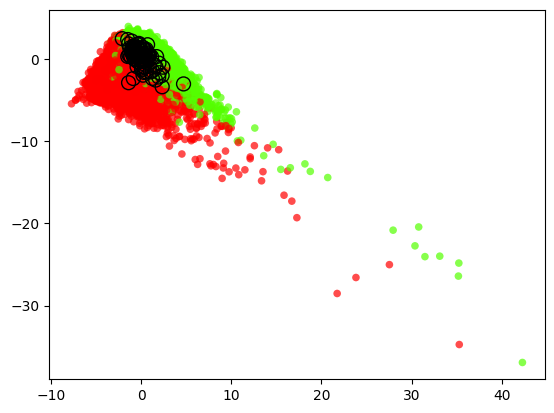

In [25]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

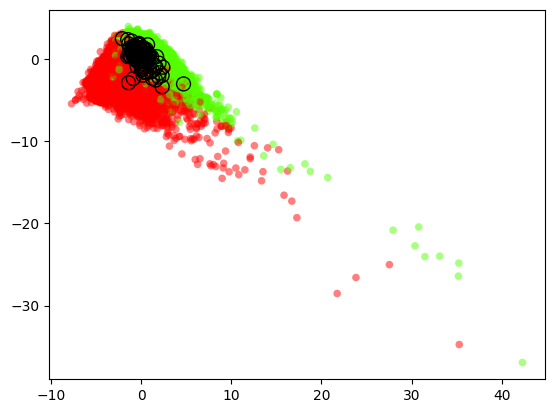

In [32]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.5, s=30)  # Aggiunta di alpha qui
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.show()


In [26]:
clf.__dict__

{'dual': 'auto',
 'tol': 0.0001,
 'C': 0.001,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': 42,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'n_features_in_': 13,
 'classes_': array([0, 1], dtype=int64),
 'coef_': array([[-0.00372388,  0.0100355 , -0.01423884,  2.23182352,  0.1756799 ,
          0.03364779, -0.09910605,  0.03385902,  0.03252285,  0.06228519,
          0.0067269 ,  0.00848002,  0.01619898]]),
 'intercept_': array([0.28507778]),
 'n_iter_': 6}

effect of c